In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [21]:
file_path = "healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Drop Unnecessary Column

In [22]:
df.drop(columns=['id'], inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Handle Missing Values

In [23]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df.head()

C:\Users\nehan\AppData\Local\Temp\ipykernel_33312\2299785183.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Encode Categorical Variables

In [29]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 


### Normalize Numerical Features

In [27]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [30]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051434,0,1,1,2,1,2.706375,1.005086,1,1
1,0,0.786070,0,0,1,3,0,2.121559,-0.098981,2,1
2,1,1.626390,0,1,1,2,0,-0.005028,0.472536,2,1
3,0,0.255342,0,0,1,2,1,1.437358,0.719327,3,1
4,0,1.582163,1,0,1,3,0,1.501184,-0.631531,2,1


# > Cleaned dataset

# Exploratory Data Analysis

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Summary statistics

In [76]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
            gender           age  hypertension  heart_disease  ever_married  \
count  5110.000000  5.110000e+03   5110.000000    5110.000000   5110.000000   
mean      0.414286  5.005781e-17      0.097456       0.054012      0.656164   
std       0.493044  1.000098e+00      0.296607       0.226063      0.475034   
min       0.000000 -1.908261e+00      0.000000       0.000000      0.000000   
25%       0.000000 -8.061152e-01      0.000000       0.000000      0.000000   
50%       0.000000  7.843218e-02      0.000000       0.000000      1.000000   
75%       1.000000  7.860701e-01      0.000000       0.000000      1.000000   
max       2.000000  1.714845e+00      1.000000       1.000000      1.000000   

         work_type  Residence_type  avg_glucose_level           bmi  \
count  5110.000000     5110.000000       5.110000e+03  5.110000e+03   
mean      2.167710        0.508023       1.001156e-16 -4.449583e-17   
std       1.090293        0.499985       1.000098e+00  

### Correlation matrix

In [77]:
correlation_matrix = df.corr()
print("\nCorrelation with Stroke:")
print(correlation_matrix["stroke"].sort_values(ascending=False))

ValueError: could not convert string to float: '0-18'

### Heatmap of correlations with stroke

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['stroke']].sort_values(by='stroke', ascending=False), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Stroke")
plt.show()

### Histograms for numerical features

In [ ]:
df[numerical_cols].hist(figsize=(12, 6), bins=20)
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

### Box plots grouped by stroke

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f"{col} by Stroke Occurrence")
    plt.show()

### Count plots for categorical features

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='stroke', data=df)
    plt.title(f"{col} Distribution by Stroke")
    plt.legend(title='Stroke')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Demographic Analysis

### Stroke distribution by age group

In [78]:
df['age_group'] = pd.qcut(df['age'], q=5, labels=['Very Young', 'Young', 'Middle-aged', 'Old', 'Very Old'])

C:\Users\nehan\AppData\Local\Temp\ipykernel_33312\2753925003.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='stroke', data=df, estimator=lambda x: sum(x)/len(x), ci=None)


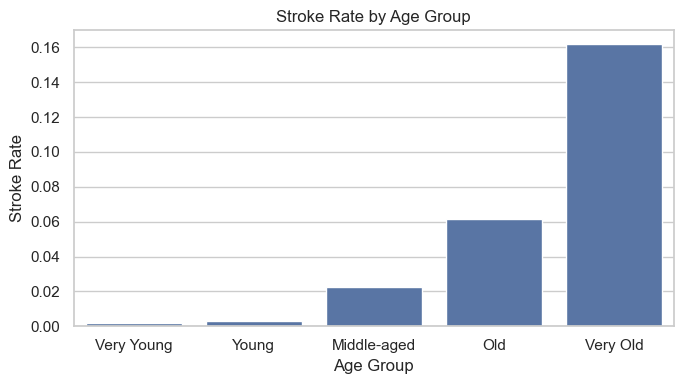

In [79]:
plt.figure(figsize=(7, 4))
sns.barplot(x='age_group', y='stroke', data=df, estimator=lambda x: sum(x)/len(x), ci=None)
plt.title('Stroke Rate by Age Group')
plt.ylabel('Stroke Rate')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

### Stroke distribution by gender

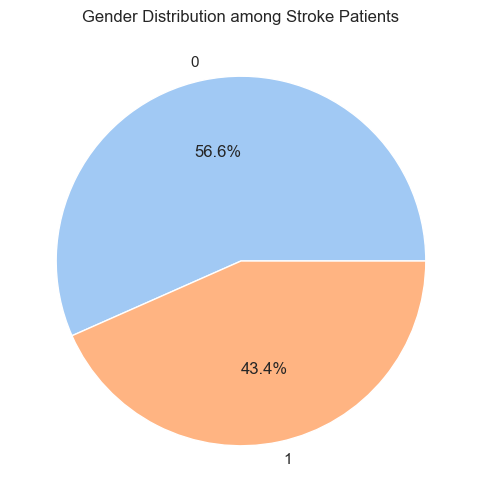

In [80]:
gender_counts = df[df['stroke'] == 1]['gender'].value_counts(normalize=True) * 100
gender_labels = label_encoders['gender'].inverse_transform(gender_counts.index)

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Gender Distribution among Stroke Patients')
plt.show()

### Stroke distribution by Residence type

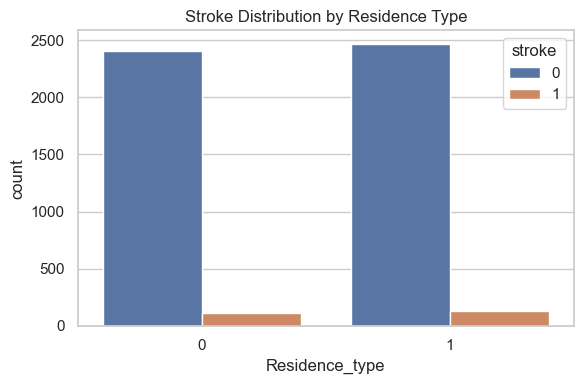

In [81]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Residence_type', hue='stroke', data=df)
plt.title('Stroke Distribution by Residence Type')
plt.xticks([0, 1], label_encoders['Residence_type'].classes_)
plt.tight_layout()
plt.show()

### Stroke distribution by marital status

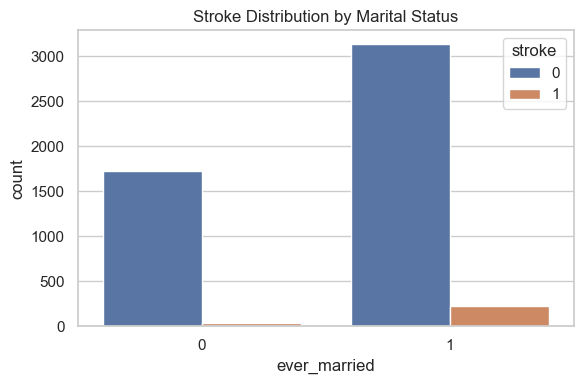

In [82]:
plt.figure(figsize=(6, 4))
sns.countplot(x='ever_married', hue='stroke', data=df)
plt.title('Stroke Distribution by Marital Status')
plt.xticks([0, 1], label_encoders['ever_married'].classes_)
plt.tight_layout()
plt.show()

### Identify which age group is most prone to stroke

In [83]:
age_stroke_rate = df.groupby('age_group')['stroke'].mean().sort_values(ascending=False)
most_prone_group = age_stroke_rate.idxmax()
most_prone_rate = age_stroke_rate.max()

print(f"📌 The age group most prone to stroke is **{most_prone_group}** with a stroke rate of **{most_prone_rate:.2f}**")

📌 The age group most prone to stroke is **Very Old** with a stroke rate of **0.16**


C:\Users\nehan\AppData\Local\Temp\ipykernel_33312\3071003289.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stroke_rate = df.groupby('age_group')['stroke'].mean().sort_values(ascending=False)


# Risk Factor Analysis

In [84]:
import scipy.stats as stats
import numpy as np

### Compare stroke rates across binary risk factors

In [85]:
binary_factors = ['hypertension', 'heart_disease']
for factor in binary_factors:
    crosstab = pd.crosstab(df[factor], df['stroke'], normalize='index')
    print(f"\nStroke Rate by {factor.capitalize()}:")
    print(crosstab)


Stroke Rate by Hypertension:
stroke               0         1
hypertension                    
0             0.960321  0.039679
1             0.867470  0.132530

Stroke Rate by Heart_disease:
stroke                0         1
heart_disease                    
0              0.958213  0.041787
1              0.829710  0.170290


### Plot

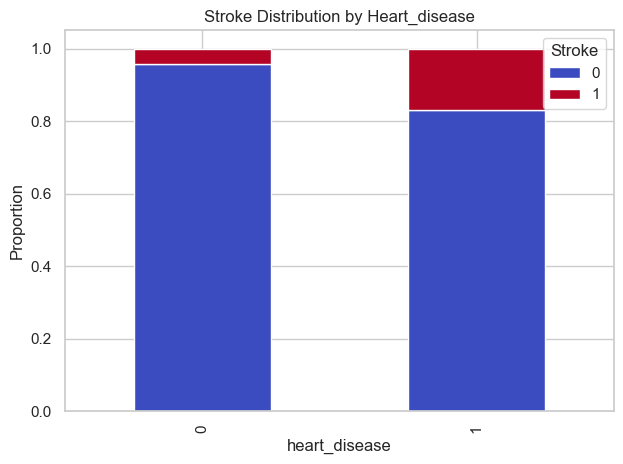

In [86]:
crosstab.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title(f"Stroke Distribution by {factor.capitalize()}")
plt.ylabel("Proportion")
plt.legend(title='Stroke', loc='upper right')
plt.tight_layout()
plt.show()

### Stroke rate by Smoking Status

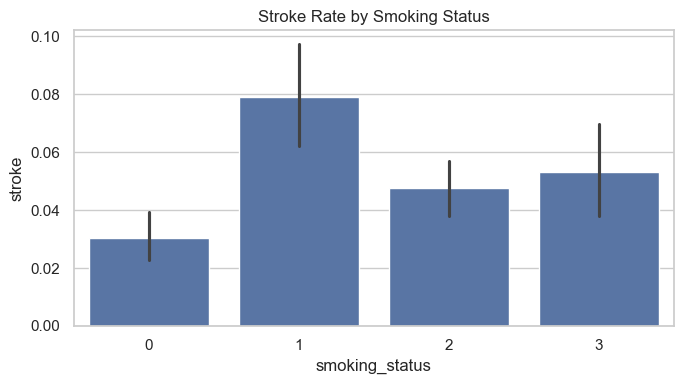

In [87]:
plt.figure(figsize=(7, 4))
sns.barplot(x='smoking_status', y='stroke', data=df, estimator=np.mean)
plt.title("Stroke Rate by Smoking Status")
plt.xticks([0, 1, 2, 3], label_encoders['smoking_status'].classes_)
plt.tight_layout()
plt.show()

## Statistical Tests

### Chi-square test for categorical variables

In [88]:
def chi_square_test(col):
    contingency = pd.crosstab(df[col], df['stroke'])
    chi2, p, _, _ = stats.chi2_contingency(contingency)
    return chi2, p

### T-test for numerical variables

In [89]:
def t_test(col):
    group0 = df[df['stroke'] == 0][col]
    group1 = df[df['stroke'] == 1][col]
    t_stat, p_val = stats.ttest_ind(group0, group1, equal_var=False)
    return t_stat, p_val

### Categorical

In [90]:
cat_vars = ['hypertension', 'heart_disease', 'smoking_status']
print("\nChi-square Tests (Categorical Risk Factors):")
for col in cat_vars:
    chi2, p = chi_square_test(col)
    print(f"{col}: chi2 = {chi2:.2f}, p = {p:.4f}")


Chi-square Tests (Categorical Risk Factors):
hypertension: chi2 = 81.61, p = 0.0000
heart_disease: chi2 = 90.26, p = 0.0000
smoking_status: chi2 = 29.15, p = 0.0000


### Numerical

In [91]:
num_vars = ['bmi', 'avg_glucose_level']
print("\nT-Tests (Numerical Risk Factors):")
for col in num_vars:
    t_stat, p_val = t_test(col)
    print(f"{col}: t = {t_stat:.2f}, p = {p_val:.4f}")


T-Tests (Numerical Risk Factors):
bmi: t = -3.33, p = 0.0010
avg_glucose_level: t = -6.98, p = 0.0000


# Trend Analysis

### Stroke trend by continuous features using KDE

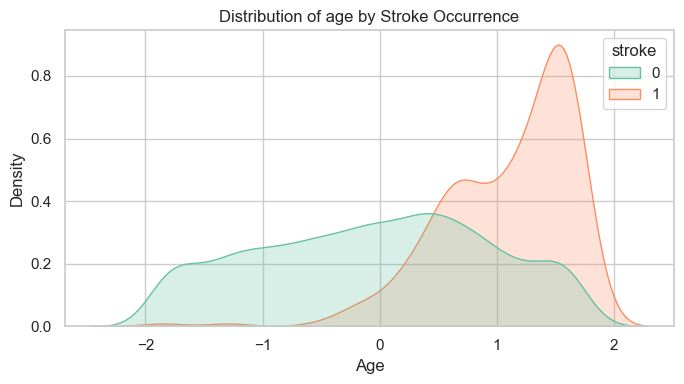

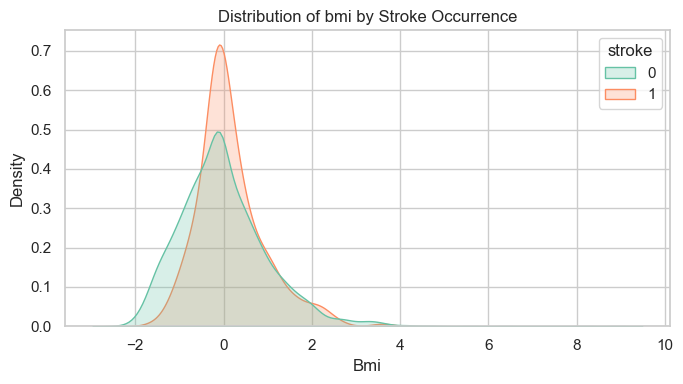

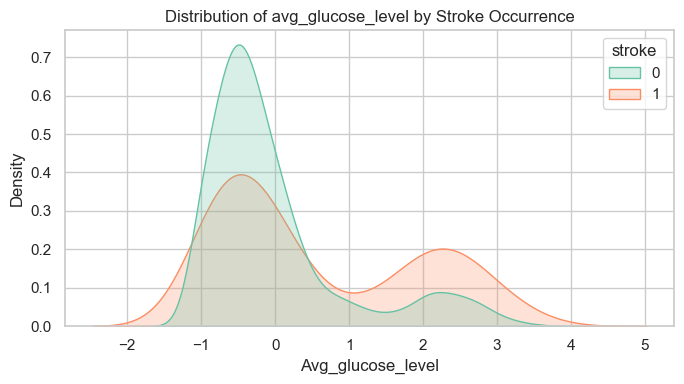

In [92]:
for col in ['age', 'bmi', 'avg_glucose_level']:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=df, x=col, hue='stroke', common_norm=False, fill=True, palette='Set2')
    plt.title(f"Distribution of {col} by Stroke Occurrence")
    plt.xlabel(col.capitalize())
    plt.tight_layout()
    plt.show()

### Scatter plot: Glucose vs. BMI colored by stroke

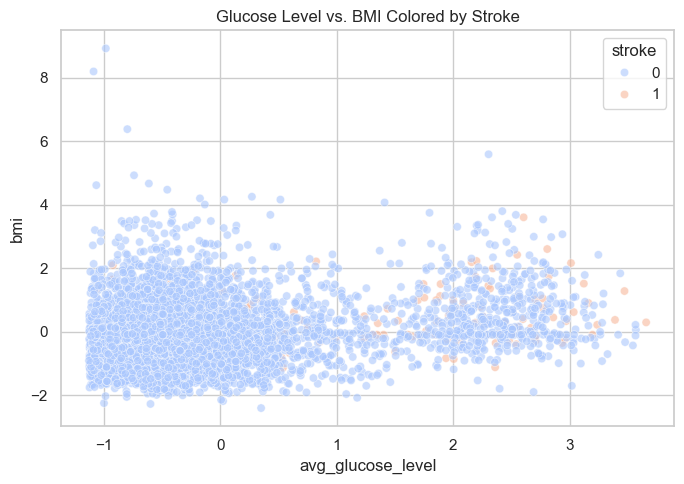

In [93]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='avg_glucose_level', y='bmi', hue='stroke', data=df, palette='coolwarm', alpha=0.6)
plt.title("Glucose Level vs. BMI Colored by Stroke")
plt.tight_layout()
plt.show()

### Violin plots: Distribution of glucose and BMI by stroke

C:\Users\nehan\AppData\Local\Temp\ipykernel_33312\1427431703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y=feature, data=df, palette='pastel')


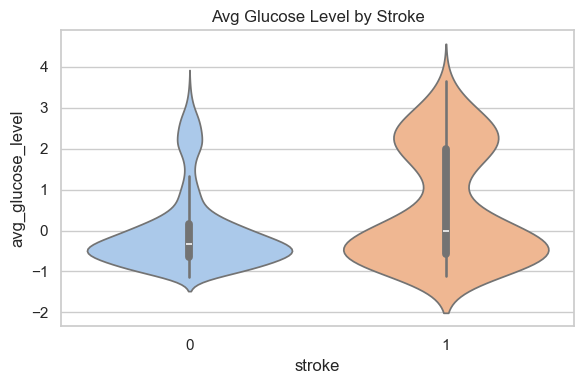

C:\Users\nehan\AppData\Local\Temp\ipykernel_33312\1427431703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y=feature, data=df, palette='pastel')


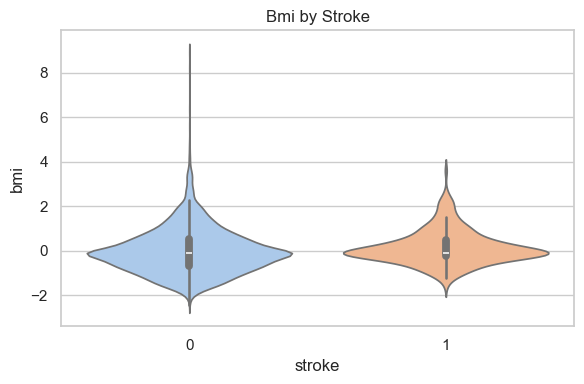

In [94]:
for feature in ['avg_glucose_level', 'bmi']:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='stroke', y=feature, data=df, palette='pastel')
    plt.title(f"{feature.replace('_', ' ').title()} by Stroke")
    plt.tight_layout()
    plt.show()

### Combined risk: Hypertension + Heart Disease vs. Stroke

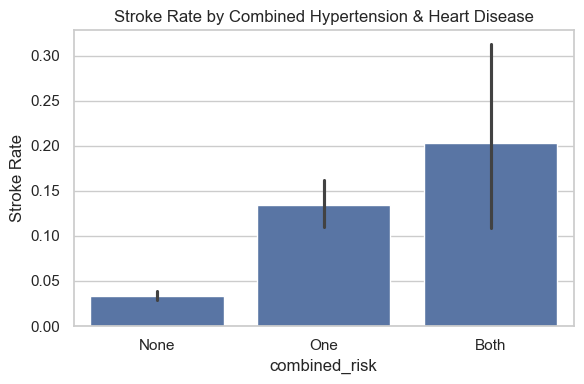

In [95]:
df['combined_risk'] = df['hypertension'] + df['heart_disease']  # 0 = none, 1 = one condition, 2 = both

plt.figure(figsize=(6, 4))
sns.barplot(x='combined_risk', y='stroke', data=df)
plt.title("Stroke Rate by Combined Hypertension & Heart Disease")
plt.xticks([0, 1, 2], ['None', 'One', 'Both'])
plt.ylabel("Stroke Rate")
plt.tight_layout()
plt.show()

### Age vs. Stroke rate (binned trend)

C:\Users\nehan\AppData\Local\Temp\ipykernel_33312\68285885.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_trend = df.groupby('age_bin')['stroke'].mean()


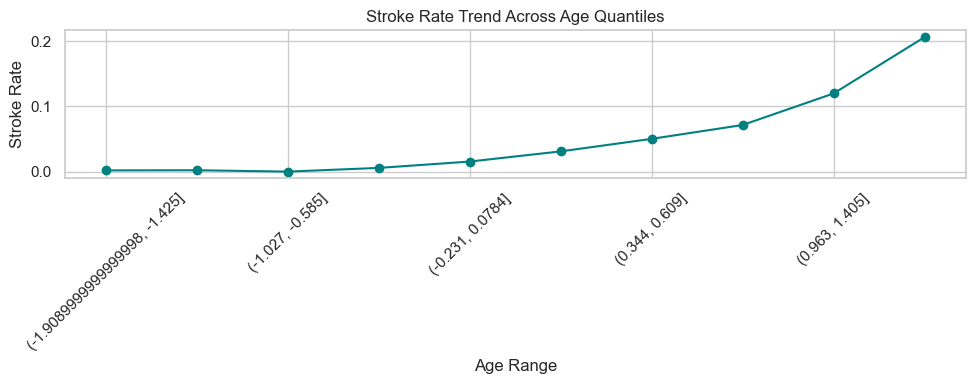

In [96]:
df['age_bin'] = pd.qcut(df['age'], q=10)
age_trend = df.groupby('age_bin')['stroke'].mean()

plt.figure(figsize=(10, 4))
age_trend.plot(marker='o', linestyle='-', color='teal')
plt.title("Stroke Rate Trend Across Age Quantiles")
plt.ylabel("Stroke Rate")
plt.xlabel("Age Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Aggregation and Grouping:

### Create age groups

In [97]:
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [98]:
agg_df = df.groupby(['gender', 'age_group']).agg(
    stroke_rate=('stroke', lambda x: 100 * x.mean()),  # Convert to percentage
    avg_bmi=('bmi', 'mean'),
    avg_glucose=('avg_glucose_level', 'mean'),
    count=('stroke', 'count')
).reset_index()

C:\Users\nehan\AppData\Local\Temp\ipykernel_33312\3784643848.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(['gender', 'age_group']).agg(


In [99]:
plot_df = agg_df[agg_df['gender'].isin(['Male', 'Female'])]

In [100]:
plot_df = agg_df[agg_df['gender'].isin(['Male', 'Female'])]

In [101]:
sns.set(style="whitegrid")

C:\Users\nehan\AppData\Local\Temp\ipykernel_33312\1293334954.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


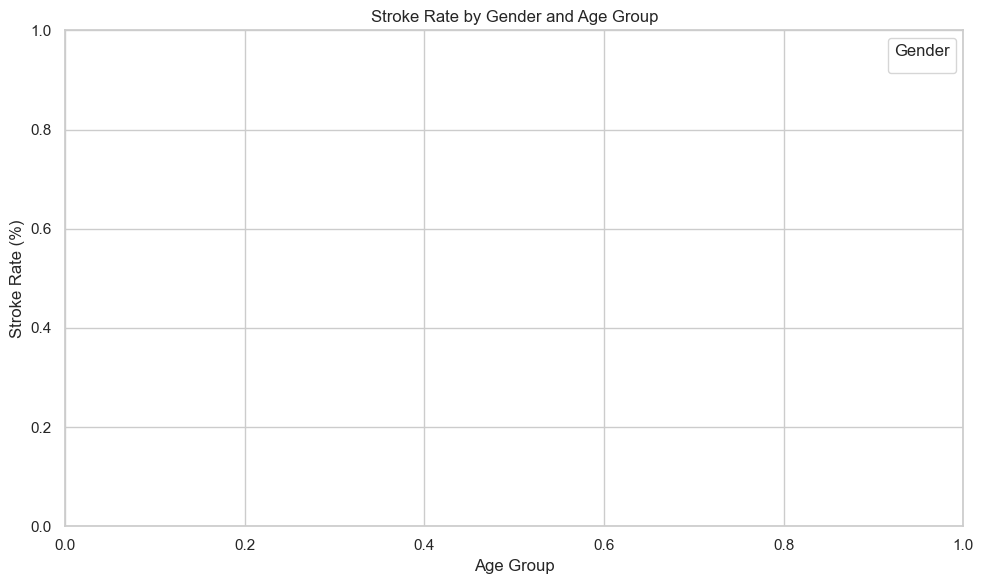

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='age_group', y='stroke_rate', hue='gender')
plt.title('Stroke Rate by Gender and Age Group')
plt.ylabel('Stroke Rate (%)')
plt.xlabel('Age Group')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

C:\Users\nehan\AppData\Local\Temp\ipykernel_33312\2503272138.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


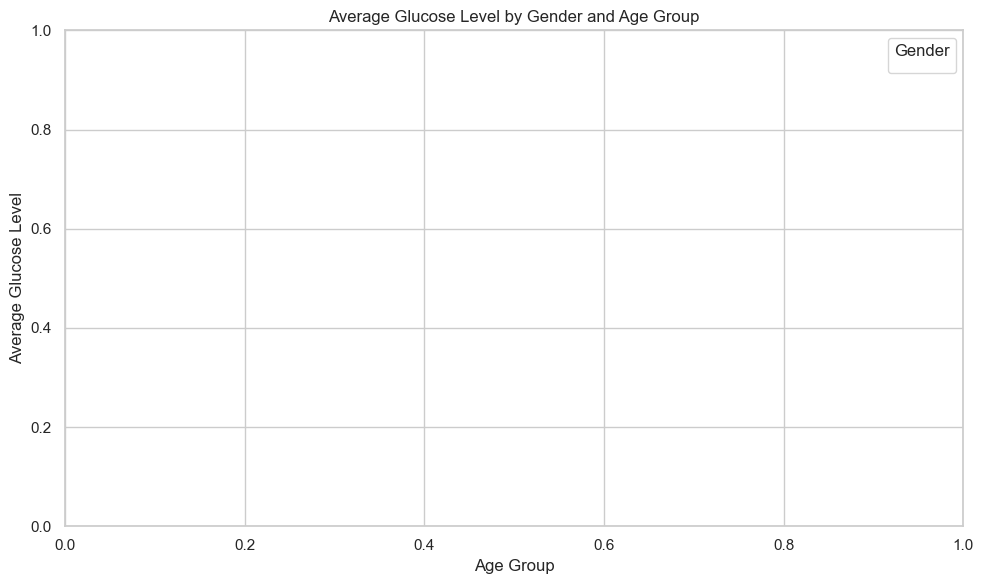

In [103]:
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='age_group', y='avg_glucose', hue='gender')
plt.title('Average Glucose Level by Gender and Age Group')
plt.ylabel('Average Glucose Level')
plt.xlabel('Age Group')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()